In [ ]:
# SMA -- Simple Moving Averages
# -- calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.
# -- used to anticipate a "signal" where SMAs of different ranges diverge or intersect

# Momentum Strategies -- Recent performance has inertia

# Mean-Revision Strategies -- Things that have deviated will return to the norm

# Let's do some backtesting, why use vectorization?
# -- It is limited but can be used to backtest simple strategies
# -- It is interactive, easy to test variations, easy to set up visualizations for, and the speed lends itself to enable comprehensive testing.

In [25]:
import numpy as np
import pandas as pd

In [38]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [1]:
# I feel like I've worked with vectors and arrays before, but why not review the fundamentals?
v = [1,2,3,4,5]
# now lets calculate a scalar product! Whyeeeeee must there be a where For art thou. Oh yeah, lists aren't pass by value!
sm = [2 * i for i in v]
print(sm)

[2, 4, 6, 8, 10]


In [2]:
print(2*v)
# to be honest I've always thought this was weird...
# This is a Python hangup, is it called "pass by object reference"?
# https://jeffknupp.com/blog/2012/11/13/is-python-callbyvalue-or-callbyreference-neither/

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


In [16]:
a = np.array(v)
print(a)
print(type(a))
print(*(2 * a), sep=", ")
print(*(0.5 * a +2), sep=", ")

[1 2 3 4 5]
<class 'numpy.ndarray'>
2, 4, 6, 8, 10
2.5, 3.0, 3.5, 4.0, 4.5


In [23]:
a = np.arange(12).reshape((4, 3))
print(np.array2string(a, separator = ", "))
print(np.array2string(2*a, separator = ", "))
print(np.array2string(a ** 2, separator = ", "))

[[ 0,  1,  2],
 [ 3,  4,  5],
 [ 6,  7,  8],
 [ 9, 10, 11]]
[[ 0,  2,  4],
 [ 6,  8, 10],
 [12, 14, 16],
 [18, 20, 22]]
[[  0,   1,   4],
 [  9,  16,  25],
 [ 36,  49,  64],
 [ 81, 100, 121]]


In [11]:
print(a.mean())
print(np.mean(a))
print(*a.mean(axis=0), sep = ", ")
print(*np.mean(a, axis=1), sep = ", ")

5.5
5.5
4.5, 5.5, 6.5
1.0, 4.0, 7.0, 10.0


In [27]:
# Now for pandas bears
a = np.arange(15).reshape(5, 3)
print(np.array2string(a,separator = ", "))

columns = list('abc')
print(columns)

index = pd.date_range('2021-7-1', periods=5, freq='B')
print(index)

df = pd.DataFrame(a, columns=columns, index=index)
print(df)

[[ 0,  1,  2],
 [ 3,  4,  5],
 [ 6,  7,  8],
 [ 9, 10, 11],
 [12, 13, 14]]
['a', 'b', 'c']
DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-05', '2021-07-06',
               '2021-07-07'],
              dtype='datetime64[ns]', freq='B')
             a   b   c
2021-07-01   0   1   2
2021-07-02   3   4   5
2021-07-05   6   7   8
2021-07-06   9  10  11
2021-07-07  12  13  14


In [34]:
print(2 * df)
print(df.sum())  # column-wise

print(np.mean(df)) # I did not know this: This will eventually return a scalar mean over the entire DataFrame. For column-wise results give an axis.
print(np.mean(df, axis=0)) # or the below:
print(df.mean())

print(df['a'] + df['c'])
print(0.5 * df.a + 2 * df.b - df.c)

print(df.a > 5)
print(df[df.a > 5])

             a   b   c
2021-07-01   0   2   4
2021-07-02   6   8  10
2021-07-05  12  14  16
2021-07-06  18  20  22
2021-07-07  24  26  28
a    30
b    35
c    40
dtype: int64
a    6.0
b    7.0
c    8.0
dtype: float64
a    6.0
b    7.0
c    8.0
dtype: float64
a    6.0
b    7.0
c    8.0
dtype: float64
2021-07-01     2
2021-07-02     8
2021-07-05    14
2021-07-06    20
2021-07-07    26
Freq: B, dtype: int32
2021-07-01     0.0
2021-07-02     4.5
2021-07-05     9.0
2021-07-06    13.5
2021-07-07    18.0
Freq: B, dtype: float64
2021-07-01    False
2021-07-02    False
2021-07-05     True
2021-07-06     True
2021-07-07     True
Freq: B, Name: a, dtype: bool
             a   b   c
2021-07-05   6   7   8
2021-07-06   9  10  11
2021-07-07  12  13  14


C:\Users\will\source\venv\dataspell_vnv\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [37]:
raw = pd.read_csv('.\data\\aiif_eikon_eod_data.csv',index_col=0, parse_dates=True).dropna()
print(raw.info())
print('\n')

data = pd.DataFrame(raw['EUR='])
print(data.info())
print('\n')

data.rename(columns={'EUR=': 'price'}, inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB
None


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EUR=    2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB
None


<class 'pandas.core.fram

             price      SMA1      SMA2
Date                                  
2019-12-24  1.1087  1.107698  1.119630
2019-12-26  1.1096  1.107740  1.119529
2019-12-27  1.1175  1.107924  1.119428
2019-12-30  1.1197  1.108131  1.119333
2019-12-31  1.1210  1.108279  1.119231




<AxesSubplot:title={'center':'EUR/USD | 42 & 252 days SMAs'}, xlabel='Date'>

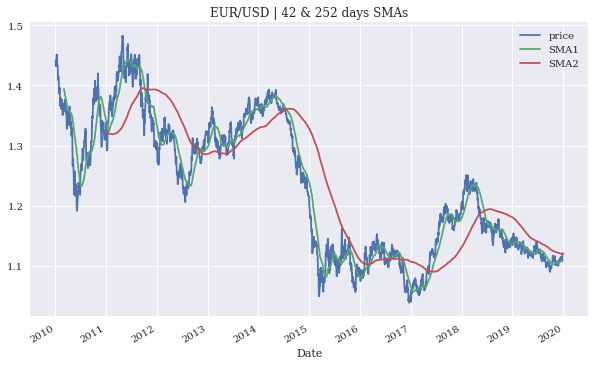

In [39]:
# Now the SMAs!
data['SMA1'] = data['price'].rolling(42).mean() # 42 days of SMA values
data['SMA2'] = data['price'].rolling(252).mean() # 252 days of SMA values
print(data.tail())
print('\n')

data.plot(title='EUR/USD | 42 & 252 days SMAs', figsize=(10, 6)) # shows the original data alonside the "Short" SMA and "Long" SMA


<AxesSubplot:title={'center':'Market Positioning'}, xlabel='Date'>

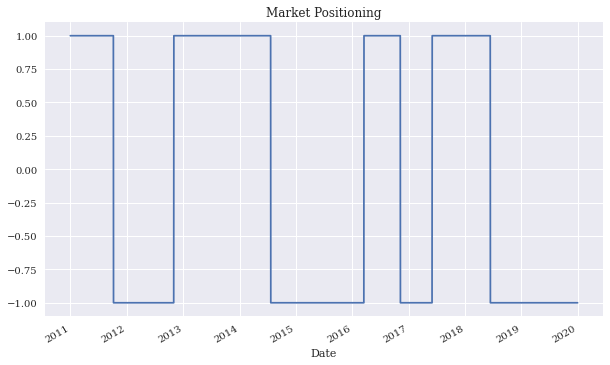

In [40]:
# produces and then plots rows with 1 when sma1 > sma2 and -1 when it is not
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
# shunks NaNs
data.dropna(inplace=True)
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning', figsize=(10, 6))

<AxesSubplot:>

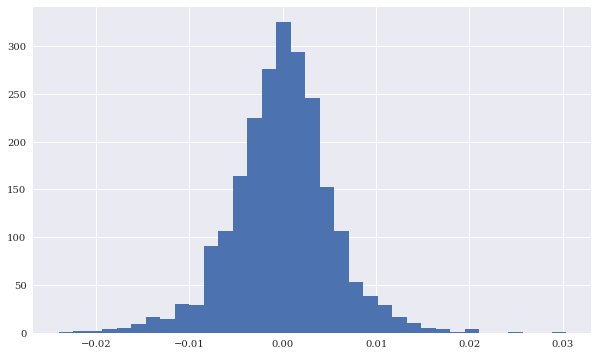

In [41]:
# To calculate the performance of the strategy:
# calculate the log returns based on the original financial time series next.
# Calculate the
data['returns'] = np.log(data['price'] / data['price'].shift(1))
data['returns'].hist(bins=35, figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

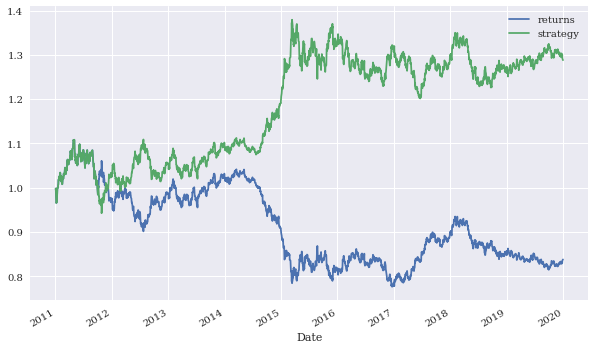

In [43]:
# "To derive the strategy returns, multiply the position column—shifted by one trading day—with the 'returns' column.
# Since log returns are additive, calculating the sum over the columns returns and strategy
# provides a first comparison of the performance of the strategy relative to the base investment itself."

# Get the strategie's returns based on positionings
data['strategy'] = data['position'].shift(1) * data['returns']
# Sum the single log return strategies for both stock and strategy
data[['returns', 'strategy']].sum()
# apply the exoponential function to the sum of the log returns to demonstrate gross performance.
data[['returns', 'strategy']].sum().apply(np.exp)

data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))